In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('churn_dataset.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598.0,9.0,1.0
1,2,41,Female,28,28,7,13,Standard,Monthly,584.0,20.0,0.0
2,3,47,Male,27,10,2,29,Premium,Annual,757.0,21.0,0.0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232.0,18.0,0.0
4,5,53,Female,58,24,9,2,Standard,Annual,533.0,18.0,0.0


In [3]:
df.shape

(41312, 12)

In [4]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,41312.000000,41312.000000,41312.000000,41312.000000,41312.0000,41312.000000,41311.000000,41311.000000,41311.000000
mean,20656.500000,41.487728,30.529580,15.533574,4.9878,15.011377,549.300138,15.514463,0.257631
std,11925.891497,13.834379,17.297588,8.638419,3.1665,8.909009,260.556045,8.625402,0.437335
min,1.000000,18.000000,1.000000,1.000000,0.0000,0.000000,100.000000,1.000000,0.000000
25%,10328.750000,30.000000,16.000000,8.000000,2.0000,7.000000,322.000000,8.000000,0.000000
50%,20656.500000,41.000000,30.000000,15.000000,5.0000,15.000000,549.000000,16.000000,0.000000
75%,30984.250000,53.000000,46.000000,23.000000,8.0000,23.000000,776.000000,23.000000,1.000000
max,41312.000000,65.000000,60.000000,30.000000,10.0000,30.000000,1000.000000,30.000000,1.000000


In [6]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,1
Total Spend,1


In [7]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
41311,41312,65,Male,11,29,2,29,Premium,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna(subset=["Churn"]) # Drops rows with missing target

In [9]:
df["Contract Length"].fillna(
    df["Contract Length"].mode()[0],
    inplace=True
)

/tmp/ipython-input-4146496865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Contract Length"].fillna(


In [10]:
df["Total Spend"].fillna(
    df["Total Spend"].median(),
    inplace=True
)

/tmp/ipython-input-295291105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Spend"].fillna(


In [11]:
df["Last Interaction"].fillna(
    df["Last Interaction"].median(),
    inplace=True
)

/tmp/ipython-input-2223206922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Last Interaction"].fillna(


In [12]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


Target Variable Distribution (Churn)

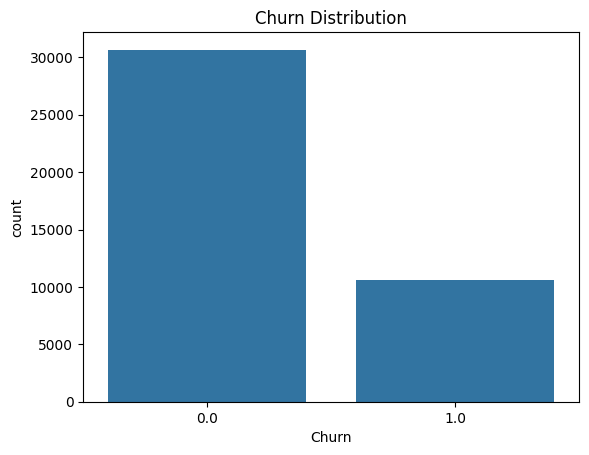

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

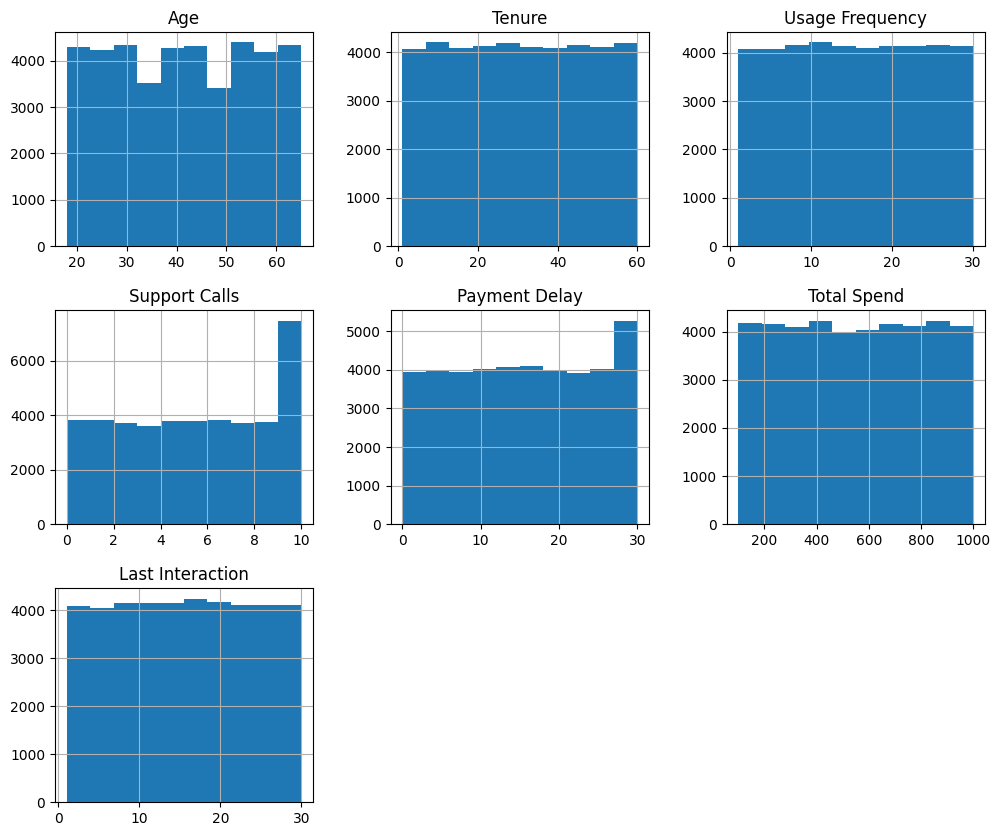

In [15]:
numerical_cols = [
    "Age", "Tenure", "Usage Frequency", "Support Calls",
    "Payment Delay", "Total Spend", "Last Interaction"
]

df[numerical_cols].hist(figsize=(12,10))
plt.show()

Feature Engineering


drop customer id

In [16]:
df.drop("CustomerID", axis=1, inplace=True)

Encode Gender (Binary Encoding)

In [17]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [18]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,Basic,Monthly,598.0,9.0,1.0
1,41,0,28,28,7,13,Standard,Monthly,584.0,20.0,0.0
2,47,1,27,10,2,29,Premium,Annual,757.0,21.0,0.0
3,35,1,9,12,5,17,Premium,Quarterly,232.0,18.0,0.0
4,53,0,58,24,9,2,Standard,Annual,533.0,18.0,0.0


One-Hot Encode Categorical Variables

df = pd.get_dummies(
    df,
    columns=["Subscription Type", "Contract Length"],
    drop_first=True
) can be converted into numberic vector

In [19]:
categorical_cols = ["Subscription Type", "Contract Length"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,0,25,14,4,27,598.0,9.0,1.0,False,False,True,False
1,41,0,28,28,7,13,584.0,20.0,0.0,False,True,True,False
2,47,1,27,10,2,29,757.0,21.0,0.0,True,False,False,False
3,35,1,9,12,5,17,232.0,18.0,0.0,True,False,False,True
4,53,0,58,24,9,2,533.0,18.0,0.0,False,True,False,False


Final Feature / Target Split

In [21]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

##### Train–Test Split

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Feature Scaling

In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build the MLP Model

In [26]:
model = Sequential()

model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model optimizer = adam used

In [27]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

training the model


In [28]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8185 - loss: 0.3797 - val_accuracy: 0.8958 - val_loss: 0.2401
Epoch 2/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9115 - loss: 0.2132 - val_accuracy: 0.9230 - val_loss: 0.1797
Epoch 3/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9287 - loss: 0.1696 - val_accuracy: 0.9389 - val_loss: 0.1478
Epoch 4/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9398 - loss: 0.1453 - val_accuracy: 0.9483 - val_loss: 0.1306
Epoch 5/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9492 - loss: 0.1277 - val_accuracy: 0.9548 - val_loss: 0.1178
Epoch 6/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9505 - loss: 0.1192 - val_accuracy: 0.9561 - val_loss: 0.1127
Epoch 7/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1127 - val_accuracy: 0.9578 - val_loss: 0.1113
Epoch 8/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9594 - loss: 0.1019 - 

Training Visualization
. Loss Curve

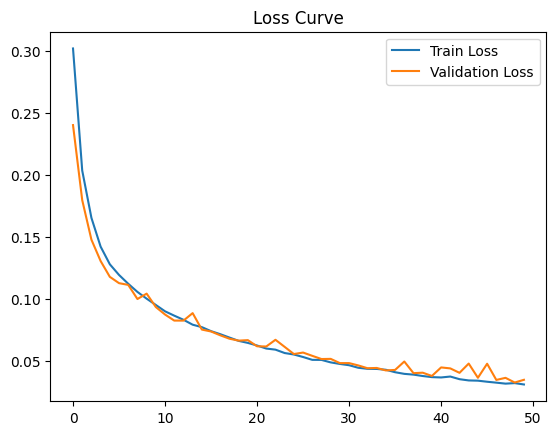

In [29]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

Accuracy Curve

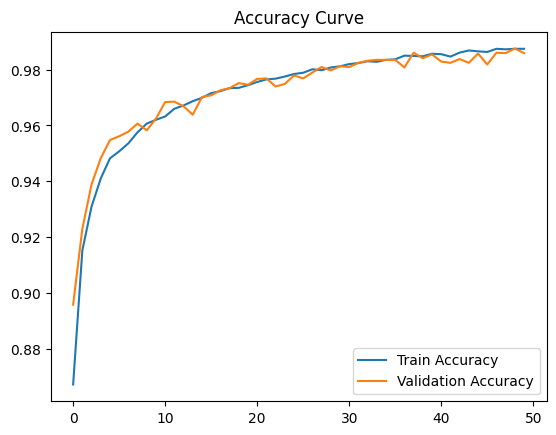

In [30]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

Model Evaluation


prediction

In [31]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


CM

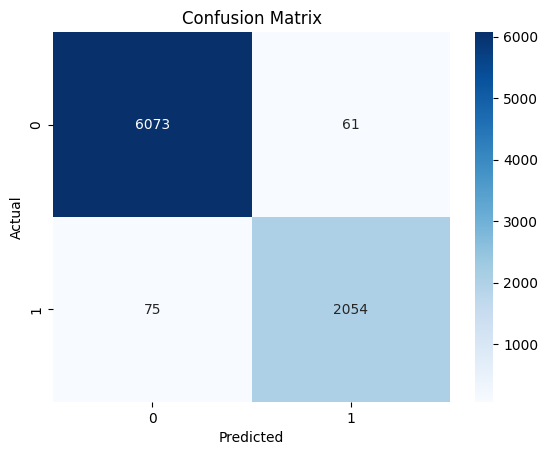

In [32]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Precision, Recall, F1-Score

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6134
         1.0       0.97      0.96      0.97      2129

    accuracy                           0.98      8263
   macro avg       0.98      0.98      0.98      8263
weighted avg       0.98      0.98      0.98      8263



The model performance is quantified using the following metrics:

- **Accuracy:** ~98.5%
- **Precision (Churn class):** ~97.1%
- **Recall (Churn class):** ~96.5%
- **F1-Score:** High and well-balanced

model summary

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,885 (11.27 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,924 (7.52 KB)

In [37]:
df = pd.get_dummies(df, drop_first=True)

In [38]:
corr_matrix = df.corr()

In [39]:
corr_matrix

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
Age,1.000000,-0.001274,-0.005264,-0.002410,-0.011623,-0.002073,0.005919,-0.001709,0.046626,-0.006605,0.006793,0.001390,-0.002341
Gender,-0.001274,1.000000,-0.001716,0.005569,-0.007231,0.009480,0.002775,-0.003769,-0.146901,0.004337,0.002907,-0.004739,-0.005871
Tenure,-0.005264,-0.001716,1.000000,-0.001521,-0.003285,-0.005223,-0.006803,0.007564,0.168417,-0.005113,0.007673,0.002474,-0.006572
Usage Frequency,-0.002410,0.005569,-0.001521,1.000000,-0.001739,-0.000868,0.000501,-0.008113,-0.102968,-0.006646,0.000595,0.004414,-0.005113
Support Calls,-0.011623,-0.007231,-0.003285,-0.001739,1.000000,0.010637,-0.001207,0.006050,0.266891,-0.005822,-0.002964,-0.004106,-0.003400
Payment Delay,-0.002073,0.009480,-0.005223,-0.000868,0.010637,1.000000,-0.005944,-0.003456,0.488409,-0.003447,-0.002150,-0.000267,-0.004864
Total Spend,0.005919,0.002775,-0.006803,0.000501,-0.001207,-0.005944,1.000000,-0.015867,-0.073516,0.008455,-0.007070,-0.004918,0.003998
Last Interaction,-0.001709,-0.003769,0.007564,-0.008113,0.006050,-0.003456,-0.015867,1.000000,0.004855,-0.008139,0.003024,0.000977,0.004377
Churn,0.046626,-0.146901,0.168417,-0.102968,0.266891,0.488409,-0.073516,0.004855,1.000000,-0.010585,-0.001578,0.054487,-0.037529
Subscription Type_Premium,-0.006605,0.004337,-0.005113,-0.006646,-0.005822,-0.003447,0.008455,-0.008139,-0.010585,1.000000,-0.501836,0.000312,0.002802


In [40]:
churn_corr = corr_matrix["Churn"].sort_values(ascending=False)
print(churn_corr)

Churn                         1.000000
Payment Delay                 0.488409
Support Calls                 0.266891
Tenure                        0.168417
Contract Length_Monthly       0.054487
Age                           0.046626
Last Interaction              0.004855
Subscription Type_Standard   -0.001578
Subscription Type_Premium    -0.010585
Contract Length_Quarterly    -0.037529
Total Spend                  -0.073516
Usage Frequency              -0.102968
Gender                       -0.146901
Name: Churn, dtype: float64


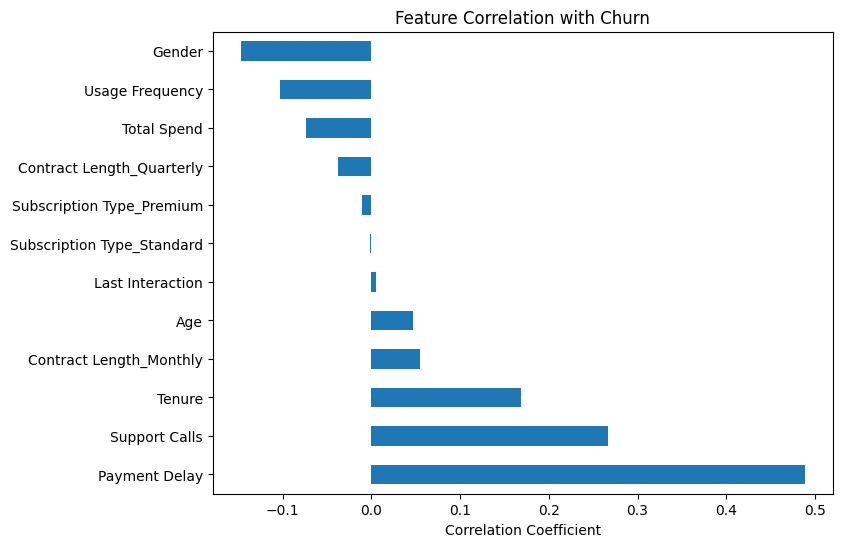

In [41]:
plt.figure(figsize=(8,6))
churn_corr.drop("Churn").plot(kind="barh")
plt.title("Feature Correlation with Churn")
plt.xlabel("Correlation Coefficient")
plt.show()

# Results and Discussion

This section presents the experimental results obtained from the **Customer Churn Prediction system using a Multi-Layer Perceptron (MLP)**. The performance of the model is evaluated using training curves and classification metrics that are appropriate for imbalanced binary classification problems such as churn prediction.

---

## 1. Training Performance Analysis

### 1.1 Loss Curve Analysis

The training and validation loss curves show a **smooth and consistent decrease** over epochs. Both curves closely follow each other with no significant divergence.

**Key Observations:**
- Continuous decrease in loss indicates effective learning.
- Small gap between training and validation loss suggests **good generalization**.
- No rise in validation loss confirms the absence of overfitting.

This behavior indicates that the model has learned meaningful patterns from the data rather than memorizing it.

---

### 1.2 Accuracy Curve Analysis

The accuracy curves demonstrate a **rapid increase during initial epochs**, followed by gradual saturation at a high value.

**Key Observations:**
- Training and validation accuracy curves overlap closely.
- Final accuracy stabilizes around **98–99%**.
- Similar trends in both curves indicate a stable and well-regularized model.

Although accuracy is high, it is not treated as the sole evaluation metric due to class imbalance in churn data.

---

## 2. Classification Performance

### 2.1 Confusion Matrix Analysis

The confusion matrix obtained from the test dataset is summarized below:

| Metric | Count |
|------|------|
| True Negatives (TN) | 6073 |
| False Positives (FP) | 61 |
| False Negatives (FN) | 75 |
| True Positives (TP) | 2054 |

**Interpretation:**
- The model correctly identifies the majority of non-churn customers.
- A very high number of churners are correctly detected.
- The number of false negatives (missed churners) is very low, which is critical from a business perspective.

---

### 2.2 Evaluation Metrics

The model performance is quantified using the following metrics:

- **Accuracy:** ~98.5%
- **Precision (Churn class):** ~97.1%
- **Recall (Churn class):** ~96.5%
- **F1-Score:** High and well-balanced

**Metric Interpretation:**
- High precision indicates that predicted churners are highly reliable.
- High recall confirms that most actual churners are successfully detected.
- Low false negative rate minimizes potential revenue loss.

In churn prediction, **recall is more important than accuracy**, as failing to identify a churner has higher business cost than falsely targeting a loyal customer.

---

## 3. Model Generalization and Reliability

The close alignment between training and validation curves, combined with strong test-set performance, demonstrates that the model generalizes well to unseen data.

There is:
- No evidence of underfitting (low bias)
- No evidence of overfitting (low variance)

This confirms that the selected MLP architecture and preprocessing pipeline are appropriate for the problem.

---

## 4. Business Interpretation of Results

From a business standpoint, the model can be effectively deployed in a customer retention system:

- Customers with high churn probability can be proactively targeted.
- Retention strategies such as discounts or personalized support can be applied.
- The low false-negative rate ensures minimal loss of valuable customers.

---

## 5. Summary

The experimental results validate that the proposed **MLP-based churn prediction model** achieves high accuracy, excellent recall, and strong generalization performance. The model successfully captures complex nonlinear relationships between customer behavior, subscription patterns, and churn likelihood, making it suitable for real-world deployment.

---